## Import package

In [41]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
import re
import threading
import time
import matplotlib.pyplot as plt
import numpy as np
import csv

## Create a dictionary

In [22]:
wc = Counter()   #字典下的子類別，計數用的
wc["C"] = 0
wc["C++"] = 0
wc["C#"] = 0
wc["PYTHON"] = 0
wc["JAVA"] = 0
wc["JAVASCRIPT"] = 0
wc["PHP"] = 0
wc["HTML"] = 0
wc["SQL"] = 0

links=[]
host = 'https://www.104.com.tw'

## Crewler thread class

In [23]:
class textThread (threading.Thread): #爬內文用的執行緒
    def __init__(self,link): #定義建構子，輸入網址連結(link)
        threading.Thread.__init__(self)
        self.link=link
    def run(self):    #overwrite
        extract(self.link)

In [24]:
class pageThread (threading.Thread): #爬頁數用的執行緒
    def __init__(self,page): 
        threading.Thread.__init__(self) 
        self.page=page 
    def run(self): 
        pageChange(self.page) 

## Text crewler

In [25]:
def extract(url):
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'lxml')
    tool = []
    target = []
    try:
        for word in soup.select('dd.tool')[0].text.split('、'):  # 每一頁面內的 "擅長工具："欄
            tool.append(word.upper())
        txt = soup.select('div.content')[1].select('dd')[7].text.upper()  # 每一頁面內的 "其他條件："欄
        othercond = re.findall('[A-Z]+[+#-C]*', "%s" % txt)   #以正規表示法找出英文單字

        for word in othercond:  # 怕有重複值，先用for迴圈檢查
            if word not in target:
                target.append(word)
    except:
        pass

    for abc in tool:  # 找出網頁內的 "擅長工具："欄內的英文單字並與自建字典比較
        if abc in wc:
            wc[abc] += 1
    for abc in target:  # 找出網頁內的 "其他條件："欄內的英文單字並與自建字典比較
        if abc in wc:
            wc[abc] += 1

## Page change crewler

In [26]:
def pageChange(page):
    host = 'https://www.104.com.tw'  
    res = requests.get('https://www.104.com.tw/jobbank/joblist/joblist.cfm?jobsource=n104bank1&ro=0&jobcat=2007000000&order=2&asc=0&page=' + 'i' + '&psl=N_A')
    txt = soup = BeautifulSoup(res.text, 'lxml')
    address = []
    for href in txt.select('div.jobname_summary > a'):  # 每一頁內各工作的連接網址
        a = href['href']
        # print(host+a)
        links.append(host + a)  # 將各內文頁的網址丟入link陣列裡

## Run multithreading

In [27]:
threadpage=[] #（換頁）所有執行緒存放的陣列
for page in range(1,100):
    Thread=pageThread(page)
    threadpage.append(Thread)
for i in threadpage:
    i.start() #執行緒開始
for i in threadpage:
    i.join()  #全部執行緒結束後主執行緒才會繼續（確保所有執行緒都跑完）

threadwords=[] #（爬內文）所有執行緒存放的陣列
for link in links:
    threadword=textThread(link)
    threadwords.append(threadword)
for i in threadwords:
    i.start() #執行緒開始
    time.sleep(0.05)
for i in threadwords:
    i.join() #全部執行緒結束後主執行緒才會繼續（確保所有執行緒都跑完）

Exception in thread Thread-6329:
Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ACER-V3\Anaconda3\lib\socket.py", line 743, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 345

Exception in thread Thread-6389:
Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ACER-V3\Anaconda3\lib\socket.py", line 743, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 345

Exception in thread Thread-6449:
Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ACER-V3\Anaconda3\lib\socket.py", line 743, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 345

Exception in thread Thread-6509:
Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ACER-V3\Anaconda3\lib\socket.py", line 743, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 345

Exception in thread Thread-6569:
Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ACER-V3\Anaconda3\lib\socket.py", line 743, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 345

Exception in thread Thread-6629:
Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ACER-V3\Anaconda3\lib\socket.py", line 743, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 345

Exception in thread Thread-6689:
Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ACER-V3\Anaconda3\lib\socket.py", line 743, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 345

Exception in thread Thread-6749:
Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ACER-V3\Anaconda3\lib\socket.py", line 743, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 345

Exception in thread Thread-6809:
Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ACER-V3\Anaconda3\lib\socket.py", line 743, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 345

Exception in thread Thread-6869:
Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ACER-V3\Anaconda3\lib\socket.py", line 743, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 345

Exception in thread Thread-6929:
Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ACER-V3\Anaconda3\lib\socket.py", line 743, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 345

Exception in thread Thread-6989:
Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ACER-V3\Anaconda3\lib\socket.py", line 743, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 345

Exception in thread Thread-7049:
Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ACER-V3\Anaconda3\lib\socket.py", line 743, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 345

Exception in thread Thread-7109:
Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ACER-V3\Anaconda3\lib\socket.py", line 743, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 345

Exception in thread Thread-7169:
Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ACER-V3\Anaconda3\lib\socket.py", line 743, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 345

Exception in thread Thread-7229:
Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ACER-V3\Anaconda3\lib\socket.py", line 743, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 345

Exception in thread Thread-7289:
Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ACER-V3\Anaconda3\lib\socket.py", line 743, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 345

Exception in thread Thread-7349:
Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ACER-V3\Anaconda3\lib\socket.py", line 743, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 345

Exception in thread Thread-7409:
Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ACER-V3\Anaconda3\lib\socket.py", line 743, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 345

Exception in thread Thread-7469:
Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ACER-V3\Anaconda3\lib\socket.py", line 743, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 345

Exception in thread Thread-7529:
Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ACER-V3\Anaconda3\lib\socket.py", line 743, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 345

Exception in thread Thread-7589:
Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ACER-V3\Anaconda3\lib\socket.py", line 743, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 345

Exception in thread Thread-7649:
Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ACER-V3\Anaconda3\lib\socket.py", line 743, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 345

Exception in thread Thread-7709:
Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ACER-V3\Anaconda3\lib\socket.py", line 743, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 345

Exception in thread Thread-7769:
Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ACER-V3\Anaconda3\lib\socket.py", line 743, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 345

Exception in thread Thread-7829:
Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ACER-V3\Anaconda3\lib\socket.py", line 743, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 345

Exception in thread Thread-7889:
Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ACER-V3\Anaconda3\lib\socket.py", line 743, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 345

Exception in thread Thread-7949:
Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ACER-V3\Anaconda3\lib\socket.py", line 743, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 345

Exception in thread Thread-8009:
Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ACER-V3\Anaconda3\lib\socket.py", line 743, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 345

Exception in thread Thread-8069:
Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ACER-V3\Anaconda3\lib\socket.py", line 743, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 345

Exception in thread Thread-8129:
Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ACER-V3\Anaconda3\lib\socket.py", line 743, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 345

Exception in thread Thread-8189:
Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ACER-V3\Anaconda3\lib\socket.py", line 743, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 345

Exception in thread Thread-8249:
Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ACER-V3\Anaconda3\lib\socket.py", line 743, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 345

Exception in thread Thread-8309:
Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ACER-V3\Anaconda3\lib\socket.py", line 743, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 345

Exception in thread Thread-8369:
Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ACER-V3\Anaconda3\lib\socket.py", line 743, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 345

Exception in thread Thread-8429:
Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ACER-V3\Anaconda3\lib\socket.py", line 743, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 345

Exception in thread Thread-8489:
Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ACER-V3\Anaconda3\lib\socket.py", line 743, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 345

Exception in thread Thread-8549:
Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ACER-V3\Anaconda3\lib\socket.py", line 743, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 345

Exception in thread Thread-8609:
Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ACER-V3\Anaconda3\lib\socket.py", line 743, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 345

Exception in thread Thread-8669:
Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ACER-V3\Anaconda3\lib\socket.py", line 743, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 345

Exception in thread Thread-8729:
Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ACER-V3\Anaconda3\lib\socket.py", line 743, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 345

Exception in thread Thread-8789:
Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ACER-V3\Anaconda3\lib\socket.py", line 743, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 345

Exception in thread Thread-8849:
Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ACER-V3\Anaconda3\lib\socket.py", line 743, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 345

Exception in thread Thread-8909:
Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ACER-V3\Anaconda3\lib\socket.py", line 743, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 345

Exception in thread Thread-8969:
Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ACER-V3\Anaconda3\lib\socket.py", line 743, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 345

Exception in thread Thread-9029:
Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ACER-V3\Anaconda3\lib\socket.py", line 743, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 345

Exception in thread Thread-9089:
Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ACER-V3\Anaconda3\lib\socket.py", line 743, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ACER-V3\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 345

## Print outcome

In [28]:
print('共爬了'+str(len(threadpage))+'頁')
print('共爬了'+str(len(threadwords))+'筆內文')
wc.most_common()

共爬了99頁
共爬了2790筆內文


[('C#', 744),
 ('JAVA', 651),
 ('PHP', 558),
 ('C++', 465),
 ('JAVASCRIPT', 279),
 ('HTML', 279),
 ('C', 186),
 ('SQL', 186),
 ('PYTHON', 93)]

## Draw statistic

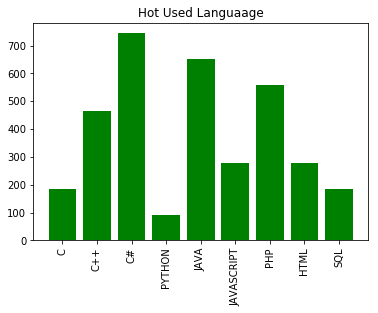

In [29]:
listname = []
listvalue = []
for i in wc.keys():
    listname.append(i)
for v in wc.values():
    listvalue.append(v)

xticks = np.arange(len(listname))
plt.xticks(xticks, list(listname))  # 用作 X 軸刻度的值
plt.xticks(rotation=90)
plt.bar(xticks, listvalue, align='center', color='green')
plt.title("Hot Used Languaage")  # 給標題
plt.show()

## To csv 

In [43]:
inners = []
for a,b in zip(wc, wc.values()):
    outcome = a,b
    inners.append(outcome)
    
f = open('104_hot_language','a')   #建立GoHappy.csv檔（'a'為append)
w = csv.writer(f)
w.writerows(inners)   #寫入結果
f.close()  #關閉資源